In [1]:
import tensorflow as tf
import os
import numpy as np

In [2]:
print(tf.__version__)

2.3.0


In [3]:
TRAIN_DIR = '/content/large_files/fruits-360/Training'
TEST_DIR = '/content/large_files/fruits-360/Test'

In [4]:
import gc
from sklearn.datasets import load_files


def load_dataset(path):
  data = load_files(path)
  files = np.array(data['filenames'])
  targets = np.array(data['target'])
  target_labels = np.array(data['target_names'])
  return files, targets, target_labels

x_train, y_train, target_labels = load_dataset(TRAIN_DIR)
x_test, y_test, _ = load_dataset(TEST_DIR)
print('Loading complete.')

print(f"# Training data samples: {x_train.shape[0]}")
print(f"# Testing data samples: {x_test.shape[0]}")
gc.collect()

Loading complete.
# Training data samples: 67692
# Testing data samples: 22688


0

In [5]:
num_classes = len(target_labels)
print(f"Number of classes: {num_classes}")

Number of classes: 131


In [6]:
from keras.utils import np_utils

print(y_train)
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_train[0]

[27 73 68 ... 90 84 86]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [7]:
# test set => (validation, test) sets
x_test, x_valid = x_test[7000:], x_test[:7000]
y_test, y_vaild = y_test[7000:], y_test[:7000]
print(f'Vaildation X: {x_valid.shape}')
print(f'Vaildation y: {y_vaild.shape}')
print(f'Test X: {x_test.shape}')
print(f'Test y: {y_test.shape}')

Vaildation X: (7000,)
Vaildation y: (7000, 131)
Test X: (15688,)
Test y: (15688, 131)


In [8]:
print(x_train[0])
target_labels[np.argmax(y_train[0])]

/content/large_files/fruits-360/Training/Cherry 2/r_263_100.jpg


'Cherry 2'

In [9]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files[:30000]:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)
gc.collect()

Training set shape :  (30000, 100, 100, 3)
Validation set shape :  (7000, 100, 100, 3)
Test set shape :  (15688, 100, 100, 3)
1st training image shape  (100, 100, 3)


0

In [10]:
print('1st training image as array',x_train[0])

1st training image as array [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [11]:
x_train = x_train / 255
x_test = x_test / 255
x_valid = x_valid / 255
gc.collect()

0

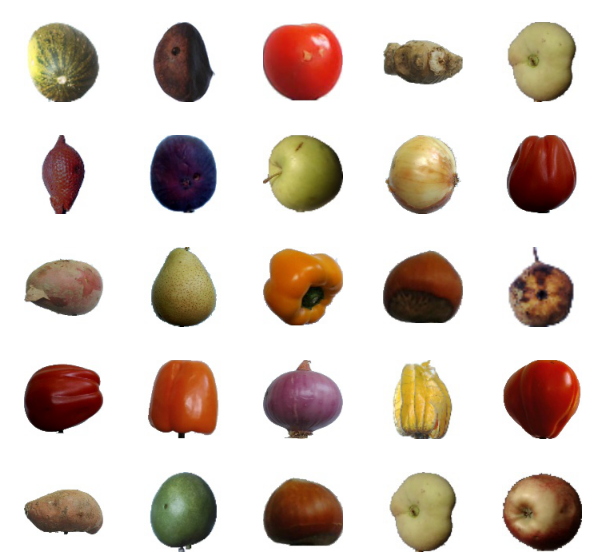

In [12]:
import matplotlib.pyplot as plt

rows = 5
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
axes = axes.ravel()
for i in np.arange(0, rows * cols):
    idx = np.random.randint(x_train.shape[0])
    axes[i].imshow(x_train[idx])
    axes[i].set_title(f"{target_labels[np.argmax(y_train[idx])]}", color="white")
    axes[i].axis('off')
    plt.subplots_adjust(wspace=0.5)

In [34]:
from collections import Counter

counter_dict = Counter(np.argmax(y_test, axis=1))
frequencies = np.array(list(counter_dict.values()))
frequencies

array([127, 117,  97, 104, 113, 141, 109, 109, 106, 124, 168, 146, 106,
       100, 109, 114, 114, 165, 150, 212,  71, 118, 109, 173, 101, 110,
        95, 117, 106, 124, 105, 110, 148, 113, 109, 117, 169, 108, 110,
       107, 121, 114, 114, 111, 106, 122, 115, 154, 119, 109, 154, 103,
       118, 122,  97, 112, 104, 119, 111, 104, 117, 157, 116, 116, 113,
       104, 107, 119, 116, 123, 176, 120, 179, 110, 117, 146, 182, 100,
       171, 117, 106, 171, 105, 104, 106, 114, 106, 111,  89, 111, 116,
       110, 112, 118, 119,  99, 116, 120, 121, 144, 126, 109, 167, 109,
       115, 109, 171, 116, 114, 106, 159, 114, 117, 110, 217, 115, 114,
       102, 118,  96,  71, 107, 119,  69,  92, 115,  82, 117, 109, 111,
       108])

In [43]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=target_labels,
                                y=frequencies,
                                mode='markers',
                                marker=dict(
                                  size=frequencies / 8,
                                  color=frequencies, #set color equal to a variable
                                  colorscale='Viridis', # one of plotly colorscales
                                  showscale=True
                                ),
                                text=target_labels)) # hover text goes here

fig.update_layout(title='Frequency of Fruits')
fig.show()

In [42]:
import plotly.figure_factory as ff

hist_data = [frequencies]
group_labels = ['Fruit Frequency PDF'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

In [13]:
# build the model
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Dropout
from keras.applications import VGG16

def build_model():

  vgg16 = VGG16(input_shape=x_train[0].shape, include_top=False, weights='imagenet')
  for layer in vgg16.layers:
    layer.trainable = False

  x = Dropout(0.2)(vgg16.output)
  x = Flatten()(x)
  x = Dense(512, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(num_classes, activation='softmax')(x)
  return Model(inputs=vgg16.input, outputs=x)

In [14]:
# fetch the model
model = build_model()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)      

In [15]:
# compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss=tf.keras.losses.categorical_crossentropy, 
    metrics=['accuracy'],
)
print("Model compiled successfully.")

Model compiled successfully.


In [ ]:
# add a data generator

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
]

In [16]:
# fit the model
r = model.fit(x=x_train, y=y_train[:30000], validation_data=(x_valid, y_vaild), epochs=15)

Epoch 1/15
938/938 [==============================] - 38s 40ms/step - loss: 1.2088 - accuracy: 0.7074 - val_loss: 0.4410 - val_accuracy: 0.8906
Epoch 2/15
938/938 [==============================] - 37s 40ms/step - loss: 0.1991 - accuracy: 0.9430 - val_loss: 0.3263 - val_accuracy: 0.9181
Epoch 3/15
938/938 [==============================] - 37s 39ms/step - loss: 0.1173 - accuracy: 0.9655 - val_loss: 0.2560 - val_accuracy: 0.9360
Epoch 4/15
938/938 [==============================] - 37s 39ms/step - loss: 0.0959 - accuracy: 0.9699 - val_loss: 0.2663 - val_accuracy: 0.9364
Epoch 5/15
938/938 [==============================] - 37s 39ms/step - loss: 0.0883 - accuracy: 0.9704 - val_loss: 0.2327 - val_accuracy: 0.9433
Epoch 6/15
938/938 [==============================] - 37s 39ms/step - loss: 0.0826 - accuracy: 0.9724 - val_loss: 0.2683 - val_accuracy: 0.9459
Epoch 7/15
938/938 [==============================] - 37s 39ms/step - loss: 0.0702 - accuracy: 0.9770 - val_loss: 0.2716 - val_accuracy:

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 432x288 with 0 Axes>

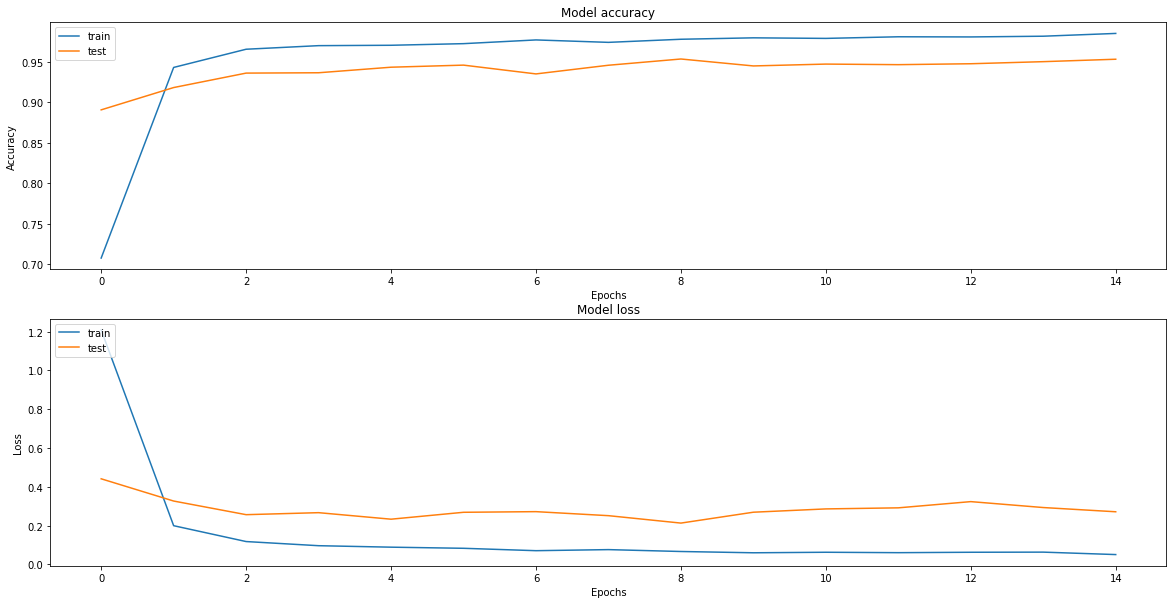

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sn
plt.figure(1)  
# plt.style.use('ggplot')
   
 # summarize history for accuracy  
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
for i, val in enumerate(["accuracy", "loss"]):
  axes[i].plot(r.history[val])
  axes[i].plot(r.history[f'val_{val}'])
  axes[i].set_title(f'Model {val}')
  axes[i].set_xlabel('Epochs')
  axes[i].set_ylabel(val.title())
  axes[i].legend(['train', 'test'], loc='upper left')  
  
  plt.subplots_adjust(wspace=1.5)

In [18]:
p_test = model.predict(x_test).argmax(axis=1)
p_test.shape

(15688,)

In [19]:
np.argmax(y_test, axis=1).shape

(15688,)

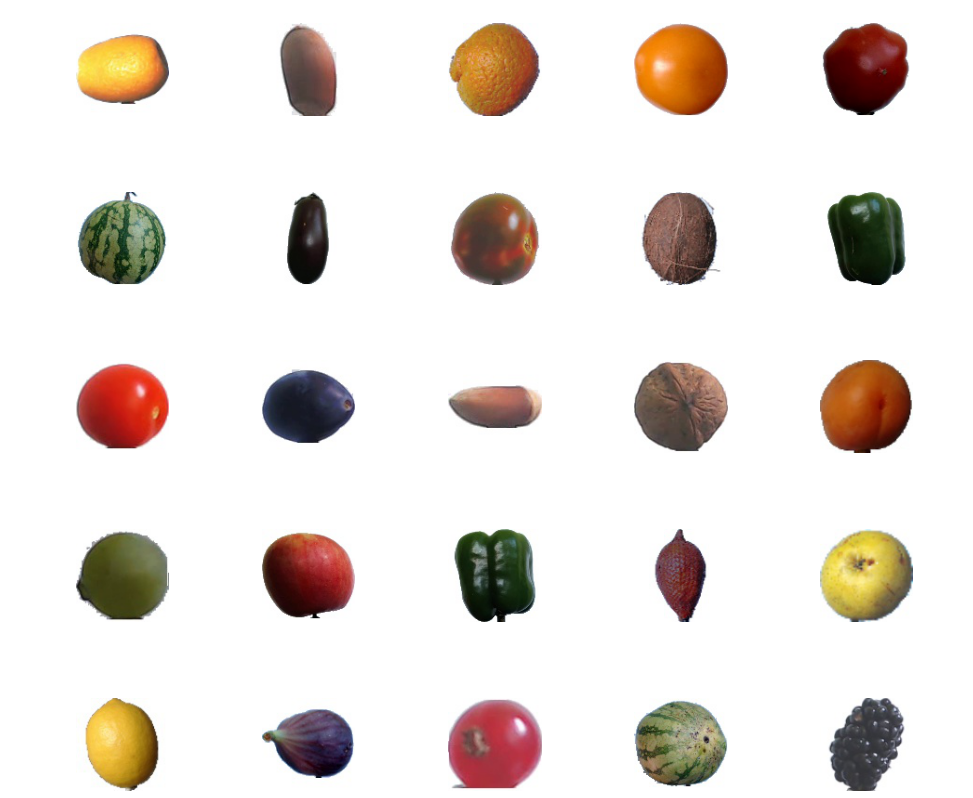

In [31]:
# Show some of the misclassified points
rows = 5
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
axes = axes.ravel()
misclassified_indices = np.where(p_test != np.argmax(y_test, axis=1))[0]
misclassified_indices.shape
for i in np.arange(0, rows * cols):
    idx = np.random.choice(misclassified_indices)
    axes[i].imshow(x_train[idx])
    axes[i].set_title(f"T: {target_labels[np.argmax(y_train[idx])]}, P: {target_labels[p_test[idx]]}", color='white')
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(p_test, np.argmax(y_test, axis=1))

In [29]:
import pandas as pd
import seaborn as sn
def plot_confusion_matrix(cm):
  df_cm = pd.DataFrame(
      cm,  
      index=[target_labels[i] for i in range(num_classes)], 
      columns=[target_labels[i] for i in range(num_classes)]
  )
  plt.figure(figsize=(30, 20))
  sn.heatmap(df_cm, annot=False)

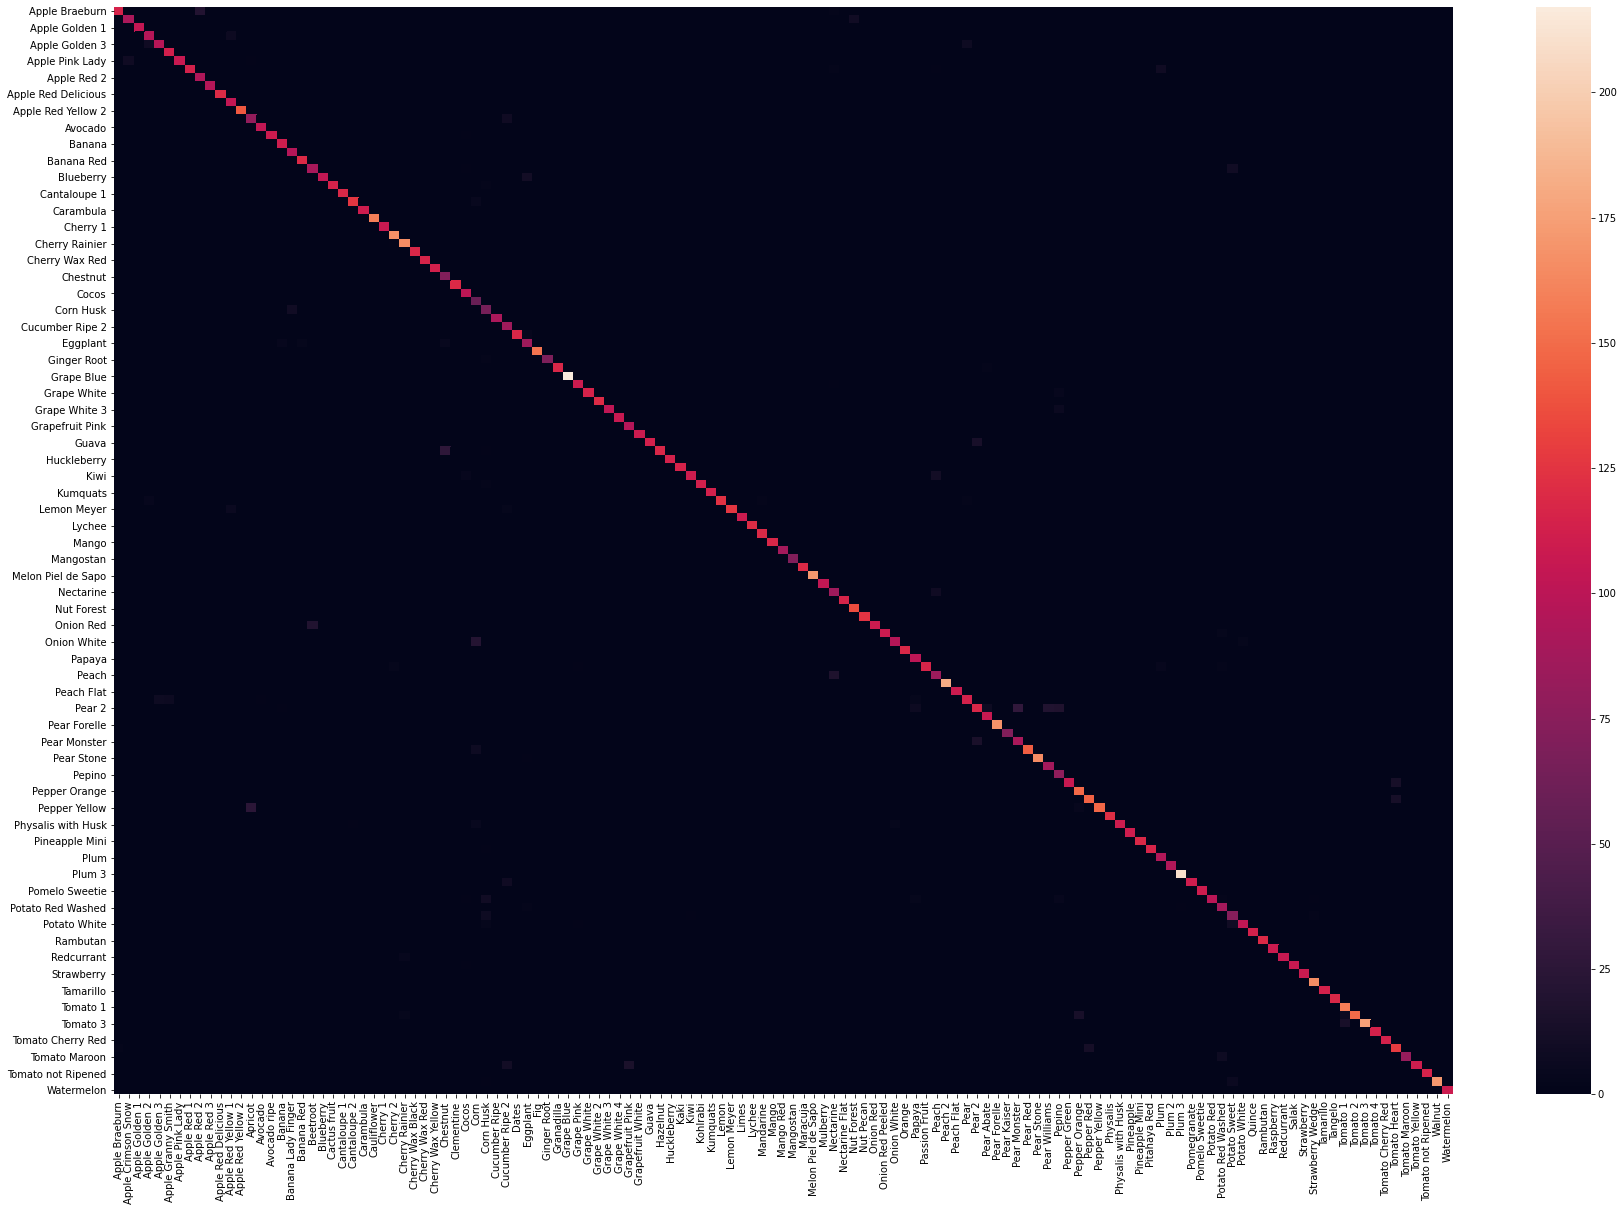

In [30]:
plot_confusion_matrix(cm)

0.9576746557878634